In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("project_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_pa,p_total_hits,p_k_percent,...,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
0,Wainwright,Adam,425794,2020,39,10,65.2,262,54,20.6,...,39.8,20.9,67.6,44.0,21.5,27.7,6.8,59.2,38.3,2.5
1,Greinke,Zack,425844,2020,37,12,67.0,273,67,24.5,...,42.3,26.0,61.9,42.9,18.9,30.6,7.7,43.5,33.2,23.3
2,Lester,Jon,452657,2020,36,12,61.0,265,64,15.8,...,41.4,23.2,58.9,48.3,23.2,23.6,4.9,73.7,12.8,13.5
3,Scherzer,Max,453286,2020,36,12,67.1,295,70,31.2,...,32.4,33.0,65.8,34.6,22.3,34.1,8.9,55.6,28.4,16.1
4,Cueto,Johnny,456501,2020,34,12,63.1,277,61,20.2,...,31.3,20.3,55.6,42.7,22.4,30.2,4.7,43.7,29.2,27.1


In [3]:
df.dtypes

last_name                 object
 first_name               object
player_id                  int64
year                       int64
player_age                 int64
p_game                     int64
p_formatted_ip           float64
p_total_pa                 int64
p_total_hits               int64
p_k_percent              float64
p_bb_percent             float64
p_out                      int64
p_era                    float64
z_swing_percent          float64
z_swing_miss_percent     float64
oz_swing_percent         float64
oz_swing_miss_percent    float64
oz_contact_percent       float64
out_zone_percent         float64
meatball_percent         float64
iz_contact_percent       float64
in_zone_percent          float64
edge_percent             float64
whiff_percent            float64
swing_percent            float64
pull_percent             float64
straightaway_percent     float64
opposite_percent         float64
f_strike_percent         float64
groundballs_percent      float64
flyballs_p

In [4]:
#  'p_game', 'p_formatted_ip', 'p_total_pa', 'p_total_hits','pull_percent', 'straightaway_percent',\'opposite_percent',
# Set features. This will also be used as your x values.
selected_features = df[['player_age',  'p_k_percent',\
                       'p_bb_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent',\
                        'oz_contact_percent', 'out_zone_percent', 'meatball_percent', 'iz_contact_percent', 'in_zone_percent',\
                        'edge_percent', 'whiff_percent', 'swing_percent', 'f_strike_percent', 'groundballs_percent', 'flyballs_percent', 'linedrives_percent',\
                        'popups_percent', 'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted' ]]

In [5]:
selected_features.head()

,player_age,p_k_percent,p_bb_percent,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_percent,meatball_percent,...,whiff_percent,swing_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
0,39,20.6,5.7,62.9,15.2,30.2,41.4,58.6,51.6,7.5,...,24.1,46.0,67.6,44.0,21.5,27.7,6.8,59.2,38.3,2.5
1,37,24.5,3.3,59.7,17.0,26.3,46.5,53.5,56.4,6.4,...,27.7,40.8,61.9,42.9,18.9,30.6,7.7,43.5,33.2,23.3
2,36,15.8,6.4,67.4,11.3,25.9,32.4,67.6,55.6,6.2,...,18.1,44.3,58.9,48.3,23.2,23.6,4.9,73.7,12.8,13.5
3,36,31.2,7.8,71.5,25.8,30.1,47.3,51.6,50.9,7.7,...,32.4,50.5,65.8,34.6,22.3,34.1,8.9,55.6,28.4,16.1
4,34,20.2,9.4,68.1,14.5,25.8,31.9,66.9,54.1,6.4,...,19.9,45.2,55.6,42.7,22.4,30.2,4.7,43.7,29.2,27.1


In [6]:
X = selected_features
y = df[['p_era']]
print(X.shape, y.shape)

(323, 23) (323, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units=50, activation = "relu", input_dim = 23))
model.add(Dropout(.1))
model.add(Dense(units=50, activation = "relu"))
model.add(Dropout(.1))
model.add(Dense(units=50, activation = "relu"))
model.add(Dropout(.1))
model.add(Dense(units=50, activation = "relu"))
model.add(Dropout(.1))
model.add(Dense(units=1, activation = "relu"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1200      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [12]:
# Fit the model to the training data
#look up validation error, train fit vs validation fit, make sure it's not overfitting
# validation error > train error, that's when you have your epoch number
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split = 0.2,
    epochs=20,
    shuffle=True,
    verbose=2
)

Epoch 1/20
7/7 - 1s - loss: 13.1874 - mean_absolute_error: 3.5185 - val_loss: 12.6051 - val_mean_absolute_error: 3.4380
Epoch 2/20
7/7 - 0s - loss: 9.6052 - mean_absolute_error: 2.9205 - val_loss: 8.3566 - val_mean_absolute_error: 2.7268
Epoch 3/20
7/7 - 0s - loss: 5.5209 - mean_absolute_error: 2.0956 - val_loss: 4.1869 - val_mean_absolute_error: 1.8192
Epoch 4/20
7/7 - 0s - loss: 2.7805 - mean_absolute_error: 1.3664 - val_loss: 2.1318 - val_mean_absolute_error: 1.1454
Epoch 5/20
7/7 - 0s - loss: 2.4113 - mean_absolute_error: 1.1980 - val_loss: 1.9836 - val_mean_absolute_error: 1.1130
Epoch 6/20
7/7 - 0s - loss: 2.2697 - mean_absolute_error: 1.1159 - val_loss: 2.0007 - val_mean_absolute_error: 1.1591
Epoch 7/20
7/7 - 0s - loss: 1.9330 - mean_absolute_error: 1.1135 - val_loss: 2.3712 - val_mean_absolute_error: 1.2848
Epoch 8/20
7/7 - 0s - loss: 1.7711 - mean_absolute_error: 1.0802 - val_loss: 2.2907 - val_mean_absolute_error: 1.2555
Epoch 9/20
7/7 - 0s - loss: 1.5487 - mean_absolute_err

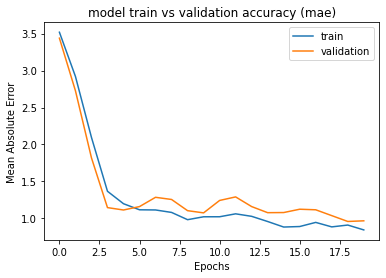

In [13]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model train vs validation accuracy (mae)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

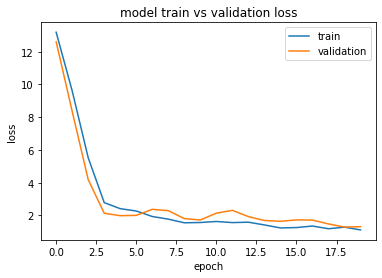

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [15]:
#train evaluation
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, y_train, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.8170 - mean_absolute_error: 0.7173
Deep Neural Network - Loss: 0.817043662071228, Accuracy: 0.7172849178314209


In [16]:
#test evaluation
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.6876 - mean_absolute_error: 0.6610
Deep Neural Network - Loss: 0.6875996589660645, Accuracy: 0.6609722375869751


In [18]:
#save model
model.save("era_predictor_model_trained.h5")